# Projet - Python Pour le BigData

## Introduction

A l’heure actuelle, les cryptomonnaies suscitent un vif intérêt de la part des investisseurs, des entreprises et du grand public, par les multiples avantages et nouvelles fonctionnalités qu’elles apportent.

Parmi celles-ci, le Bitcoin, créé en 2009 par Satoshi Nakamoto, se présente comme leur porte-étendard, étant la plus populaire et la plus utilisée à ce jour.

Ainsi, il peut être intéressant de prédire l’évolution du Bitcoin au cours du temps, pour capitaliser et profiter des avantages octroyés par la monnaie, ou encore prévenir les risques liés à son utilisation.

Pour cela, nous aurons besoin de modules et de librairies essentiels :

In [21]:
import os
import datetime as dt
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pylab as plt
from matplotlib import dates as mdates

## I. Courbes prédictives

Nous possédons un ensemble de données entourant l’évolution du Bitcoin entre 2015 et 2017, dont son cours au travers de cette période.

In [22]:
# Cleaning and creating dataframe
df = pd.read_csv("timeseries/external.csv", sep=",", index_col="date")
df = df.drop("Unnamed: 0", axis=1)
df.index.names = ["Date"]
df = df.reset_index()
df["Date"] = pd.to_datetime(df["Date"])
df

,Date,PriceUSD,HashRate
0,2015-01-02,315.942732,3.333450e+05
1,2015-01-03,285.647310,3.272842e+05
2,2015-01-04,263.334575,3.474869e+05
3,2015-01-05,275.003852,3.151626e+05
4,2015-01-06,287.549521,3.192031e+05
...,...,...,...
906,2017-06-26,2426.365051,5.023770e+06
907,2017-06-27,2530.345536,4.634604e+06
908,2017-06-28,2562.792264,5.554450e+06
909,2017-06-29,2540.443032,4.245439e+06


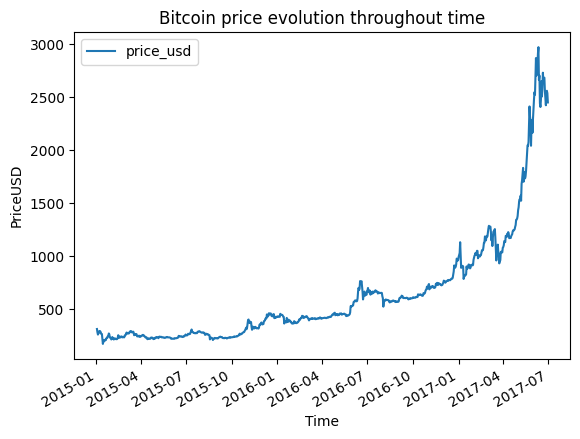

In [23]:
# Creating a plot
plt.plot(df["Date"], df["PriceUSD"], label='price_usd')
plt.legend()
plt.title("Bitcoin price evolution throughout time")
plt.xlabel("Time")
plt.ylabel("PriceUSD")
plt.gcf().autofmt_xdate()
plt.show()

Pour obtenir une équation de courbe prédictive de l’évolution du cours du Bitcoin à travers le temps, nous serions tentés d’effectuer une régression linéaire sur notre jeu de données.

Cette méthode permet de rechercher la droite permettant d'expliquer le comportement d'une variable statistique y, ici le cours du Bitcoin, comme étant une fonction affine d'une autre variable statistique x, ici le temps.

In [24]:
# Converting Date data to ordinal values
df["Date"] = pd.to_datetime(df["Date"]).map(dt.datetime.toordinal)

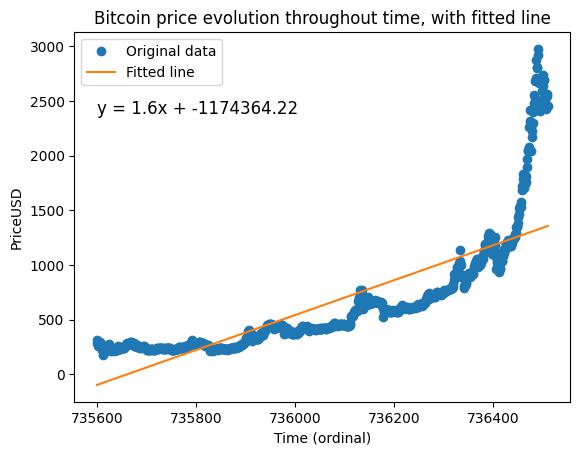

R² = 0.63


In [25]:
# Creating a Linear regression model from our data
fit = np.polyfit(df["Date"], df["PriceUSD"], 1)
fit1d = np.poly1d(fit)

# Recovering both coeffs from function
a = round(fit1d[1], 2)
b = round(fit1d[0], 2)

# Creating a plot
plt.plot(df["Date"], df["PriceUSD"], 'o', label='Original data')
plt.plot(df["Date"], fit1d(df["Date"]), label='Fitted line')
plt.text(df['Date'].min(), df['PriceUSD'].max() * 0.8, f'y = {a}x + {b}', fontsize=12)
plt.legend()
plt.title("Bitcoin price evolution throughout time, with fitted line")
plt.xlabel("Time (ordinal)")
plt.ylabel("PriceUSD")
plt.show()

# Calculating determination coefficient R²
mean_price_usd = np.mean(df["PriceUSD"])
total_square_sum = np.sum((df["PriceUSD"] - mean_price_usd) ** 2)
residual_square_sum = np.sum((df["PriceUSD"] - fit1d(df["Date"])) ** 2)
r_2 = 1 - (residual_square_sum / total_square_sum)
print("R² =", round(r_2, 2))

Le coefficient de détermination R² permet d'expliquer la quantité de variation prédite par notre régression.
Plus R² se rapproche de 1, plus la courbe de régression explique la variance totale des données et plus le modèle est précis.
R² ici est moyennement haut (0.7 > R² > 0.5), notre modèle prédit ainsi convenablement la tendance d'évolution des données. 

Nous constatons cependant que la prédiction ne colle pas à l'évolution réelle du cours.
Une piste serait que nos données ne semblent pas évoluées de manière linéaire, l’évolution semblant être exponentielle.

Nous serions alors tentés d’effectuer une régression exponentielle pour matcher davantage l'évolution de notre jeu de donnée.

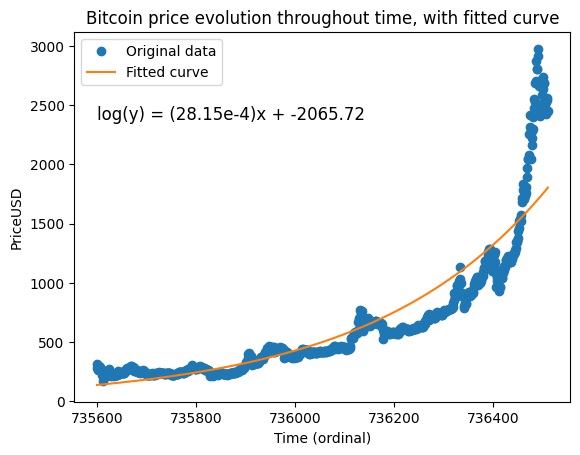

R² = 0.83


In [26]:
# Creating an Exponential regression model from our data
fit = np.polyfit(df["Date"], np.log(df["PriceUSD"]), 1, w=np.sqrt(df["PriceUSD"]))
fit1d = np.poly1d(fit)

# Recovering main coeffs from function
b = round(fit1d[0], 2)

# Creating a plot
plt.plot(df["Date"], df["PriceUSD"], 'o', label='Original data')
plt.plot(df["Date"], np.exp(fit1d(df["Date"])), label='Fitted curve')
plt.text(df['Date'].min(), df['PriceUSD'].max() * 0.8, f'log(y) = (28.15e-4)x + {b}', fontsize=12)
plt.legend()
plt.title("Bitcoin price evolution throughout time, with fitted curve")
plt.xlabel("Time (ordinal)")
plt.ylabel("PriceUSD")
plt.show()

# Calculating determination coefficient R²
mean_price_usd = np.mean(df["PriceUSD"])
total_square_sum = np.sum((df["PriceUSD"] - mean_price_usd) ** 2)
residual_square_sum = np.sum((df["PriceUSD"] - np.exp(fit1d(df["Date"]))) ** 2)
r_2 = 1 - (residual_square_sum / total_square_sum)
print("R² =", round(r_2, 2))

La courbe exponentielle match en effet beaucoup mieux l’évolution réelle du cours du Bitcoin (R² > 0.7).

La correspondance n’est cependant pas parfaite, notre jeu de donnée semblant croitre beaucoup plus rapidement que notre courbe prédictive.

Une régression polynomiale de notre jeu de donnée pourrait être une piste de sortie, nous permettant de trouver une courbe matchant au mieux les variations.

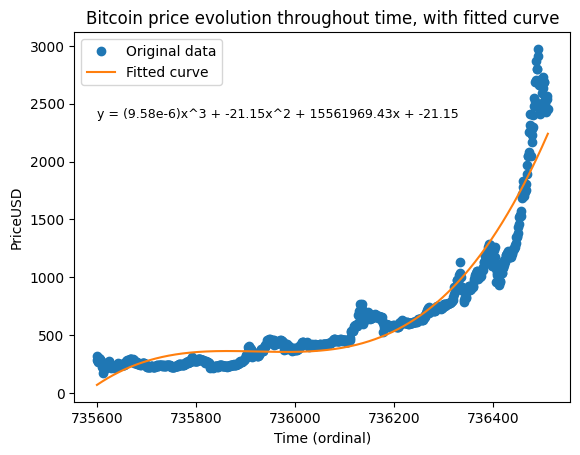

R² = 0.9


In [27]:
# Creating a Polynomial regression model from our data
fit = np.polyfit(df["Date"], df["PriceUSD"], 3)
fit1d = np.poly1d(fit)

# Recovering main coeffs from function
b = round(fit1d[2], 2)
c = round(fit1d[1], 2)
d = round(fit1d[0], 2)

# Creating a plot
plt.plot(df["Date"], df["PriceUSD"], 'o', label='Original data')
plt.plot(df["Date"], fit1d(df["Date"]), label='Fitted curve')
plt.text(df['Date'].min(), df['PriceUSD'].max() * 0.8, f'y = (9.58e-6)x^3 + {b}x^2 + {c}x + {b}', fontsize=9)
plt.legend()
plt.title("Bitcoin price evolution throughout time, with fitted curve")
plt.xlabel("Time (ordinal)")
plt.ylabel("PriceUSD")
plt.show()

# Calculating determination coefficient R²
mean_price_usd = np.mean(df["PriceUSD"])
total_square_sum = np.sum((df["PriceUSD"] - mean_price_usd) ** 2)
residual_square_sum = np.sum((df["PriceUSD"] - fit1d(df["Date"])) ** 2)
r_2 = 1 - (residual_square_sum / total_square_sum)
print("R² =", round(r_2, 2))

La courbe polynomiale match bien l'évolution réelle du cours du Bitcoin (R² > 0.7), croissant plus rapidement que la courbe exponentielle, correspondant mieux aux variations de notre jeu de données.

Nous prédisons finalement que le cours du Bitcoin pourrait continuer de croitre drastiquement dans le future.

Le pouvoir prédictif de notre courbe est cependant limité. 

Premièrement, elle ne croit toujours pas aussi rapidement que l'évolution réelle des données.

Secondement, notre modèle n'inclut pas l'influence de paramètres pouvant modifier la tendance d'évolution du cours du Bitcoin.

Finalement, nous manquons de données. ne traitant qu'une courte echelle de temps (2015 - 2017) par à rapport à l'évolution du cours d'une monnaie, nous ne pouvons avoir un avis davantage robuste sur la tendance réelle de l'évolution cours du Bitcoin.

## II. Corrélations

Importons un ensemble de paramètres dans notre précédent tableau pouvant influencer le cours du Bitcoin.

In [28]:
# Cleaning et merging dataframes
df = df.set_index("Date")
df.index = df.index.map(dt.datetime.fromordinal)
df2 = pd.read_csv("timeseries/global.csv", sep=",", index_col="Unnamed: 0")
df2.index.names = ["Date"]
df2.index = pd.to_datetime(df2.index)
df = df.merge(df2, how="inner", on="Date")
df.rename(columns = {'PriceUSD':'price_usd', 'HashRate':'hash_rate'}, inplace = True)
df.index.names = ["date"]
df

,price_usd,hash_rate,year,month,day,total_fee,total_received_satoshi,total_sent_satoshi,mean_fee_satoshi,mean_feeUSD,...,nb_transactions,nb_payments,mean_nb_inputs,mean_nb_outputs,nb_mining,total_mining_satoshi,newly_created_coins,self_spent_satoshi,total_received,volume_without_self
date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,315.942732,3.333450e+05,2015,1,2,1159934218,73370568521080,72955568521080,14978.682808,4.732406e+06,...,77439,257633,2.715557,3.326915,166,416159934218,415000000000,4316724676318,73370568521080,69053843844762
2015-01-03,285.647310,3.272842e+05,2015,1,3,1196476043,82635189454578,82220189454578,14304.385766,4.086009e+06,...,83644,295618,2.781885,3.534240,166,416196476043,415000000000,5584584356557,82635189454578,77050605098021
2015-01-04,263.334575,3.474869e+05,2015,1,4,2159195328,115159442449532,114726942449532,25138.199015,6.619757e+06,...,85893,280288,2.770133,3.263223,173,434659195328,432500000000,6554587956125,115159442449532,108604854493407
2015-01-05,275.003852,3.151626e+05,2015,1,5,1608443040,112439228285641,112051728285641,16955.609622,4.662858e+06,...,94862,286552,2.954471,3.020725,155,389108443040,387500000000,5063695492444,112439228285641,107375532793197
2015-01-06,287.549521,3.192031e+05,2015,1,6,1296373032,118260758863552,117868258863552,14667.176159,4.217540e+06,...,88386,252571,2.869595,2.857591,157,393796373032,392500000000,4026430543611,118260758863552,114234328319941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-06-26,2426.365051,5.023770e+06,2017,6,26,35993152232,375012739382430,374842739382430,145080.443192,3.520181e+08,...,248091,626222,2.565329,2.524163,136,205993152232,170000000000,14151200557043,375012739382430,360861538825387
2017-06-27,2530.345536,4.634604e+06,2017,6,27,38384859820,287624055555912,287452805555912,142346.452989,3.601857e+08,...,269658,747924,2.314862,2.773602,137,209634859820,171250000000,19821969138631,287624055555912,267802086417281
2017-06-28,2562.792264,5.554450e+06,2017,6,28,38663204682,282904720130478,282717220130478,140744.451983,3.606988e+08,...,274705,686018,2.471178,2.497290,150,226163204682,187500000000,10958737629631,282904720130478,271945982500847


Construisons la table de corrélation entre le cours du Bitcoin et les autres paramètres et gardons les corrélations significatives (> 0.1 ou < -0.1).

In [29]:
# Creating and cleaning the correlation table
df_corr = pd.DataFrame(df.corr()["price_usd"].sort_values(ascending=False))
df_corr = df_corr[np.absolute(df_corr) > 0.1].dropna()
df_corr = df_corr.drop("price_usd")
df_corr

,price_usd
total_fee,0.951675
mean_fee_satoshi,0.951570
mean_feeUSD,0.937520
hash_rate,0.937447
year,0.787660
nb_transactions,0.700906
nb_payments,0.525985
self_spent_satoshi,0.236655
mean_fee_for100,0.218620
mean_nb_outputs,-0.238592


<Axes: >

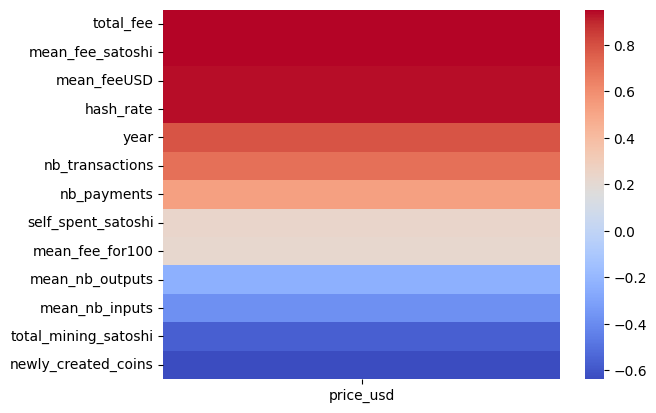

In [30]:
# Printing the heatmap correlation
sns.heatmap(df_corr, cmap='coolwarm')

Nous remarquons tout d'abord que le cours du Bitcoin est positivement fortement corrélé (> 0.7) à une mesure de temps, l'année. Plus le temps avance, plus le cours du Bitcoin augmente. Cela confirme bien le comportement de nos courbes prédictives, obtenues à partir de regression sur le temps, montrant que le cours du Bitcoin croit de plus en plus rapidement au fur et à mesure du temps.

Nous remarquons ensuite que le cours du Bitcoin est positivement fortement corrélé (>= 0.7) à la majorité des différentes mesures de frais de mineurs (total & mean fee), mise à part la moyenne des montants des transactions payés en frais (mean_fee_for100), tout de même corrélée positivement (~ 0.22). Plus le cours du Bitcoin augmente, plus les mesures de frais de mineurs augmentent. 

Cela peut suggérer que l'augmentation du cours du Bitcoin a un fort impact positif sur les frais de mineurs. Cela peut aussi suggérer que l'augmentation des frais de mineurs a un fort impact positif sur le cours du Bitcoin.

En effet, les frais de mineurs sont de petites quantités de Bitcoin payées par les utilisateurs de la monnaie aux mineurs, soient aux acteurs validant les transactions effectuées sur le réseau monétaire, pour les inciter à traiter leur transaction. Leur travail est essentiel pour garantir la sécurité et la fiabilité du réseau Bitcoin. 

Ainsi, nous pouvons suggérer que plus la monnaie gagne en valeur, plus les mineurs sont fortement recompensés pour leur travail, plus les transactions sont importantes et traitées efficacement et rapidement, plus le réseau monétaire fait gage de qualité, plus la monnaie est attractive et gagne en valeur (ex: par l'augmentation des investissements), etc.

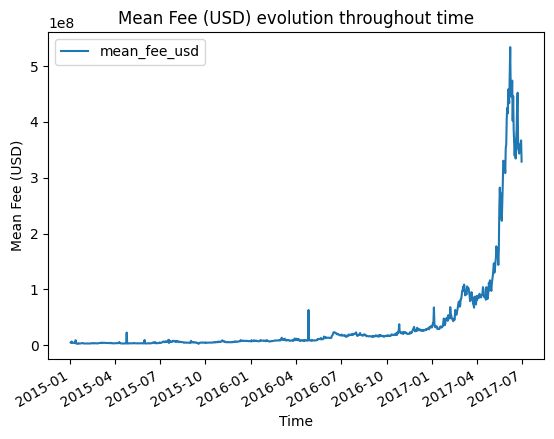

In [31]:
# Creating a plot
plt.plot(df.index, df["mean_feeUSD"], label='mean_fee_usd')
plt.legend()
plt.title("Mean Fee (USD) evolution throughout time")
plt.xlabel("Time")
plt.ylabel("Mean Fee (USD)")
plt.gcf().autofmt_xdate()
plt.show()

Nous remarquons aussi le nombre de transactions est positivement fortement corrélé (>= 0.7) au cours du Bitcoin, de même que pour les transactions mesurés en nombre de payements, positivement moyennement corrélé (~ 0.5). Plus le cours du Bitcoin augmente, plus le nombre de transactions augmente.

Cela peut suggérer que l'augmentation du cours du Bitcoin a un impact positif sur le nombre de transactions. Cela peut aussi suggérer que l'augmentation du nombre de transactions a un impact positif sur le cours du Bitcoin.

En effet, nous pouvons suggérer que plus le monnaie gagne en valeur, plus elle est attractive, plus le nombre de transactions traitées augmente, plus elle gagne en valeur (ex: par l'augmentation des investissements), etc.

L'interprétation corrobore celle proposée pour l'augmentation des frais de mineurs.

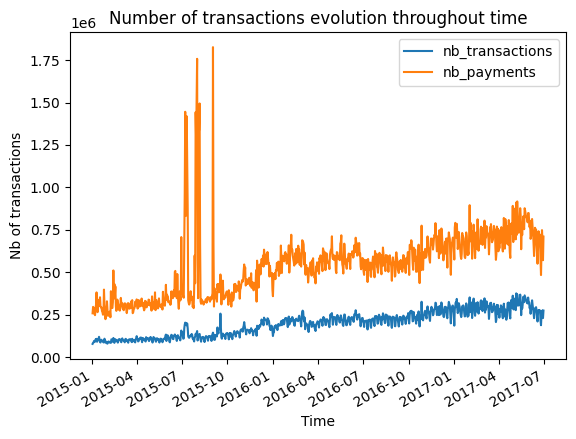

In [32]:
# Creating a plot
plt.plot(df.index, df["nb_transactions"], label='nb_transactions')
plt.plot(df.index, df["nb_payments"], label='nb_payments')
plt.legend()
plt.title("Number of transactions evolution throughout time")
plt.xlabel("Time")
plt.ylabel("Nb of transactions")
plt.gcf().autofmt_xdate()
plt.show()

Nous remarquons également que le taux de hachage est positivement fortement corrélée (> 0.7) au cours du Bitcoin. Plus le cours du Bitcoin augmente, plus le taux de hachage augmente.

Cela peut suggérer que l'augmentation du cours du Bitcoin a un impact positif sur le taux de hachage. Cela peut aussi suggérer que l'augmentation du taux de hachage a un impact positif sur le cours du Bitcoin.

En effet, le taux de hachage est entre autre une mesure de la puissance de calcul de traitement des transactions.

Ainsi, nous pouvons suggérer que plus le taux de hachage augmente, plus la compétition entre les mineurs pour traiter et intégrer les transactions au réseau monétaire augmente, plus le réseau fait gage de qualité, plus la monaie est attractive et gagne en valeur.

L'interprétation corrobore celles proposées pour les corrélations précedemment étudiées.

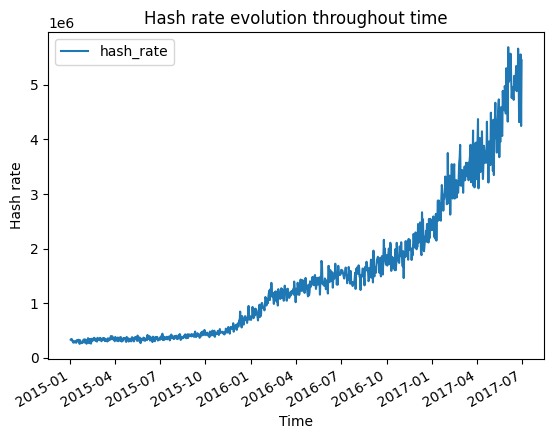

Correlation between hash_rate and nb_transactions = 0.83 
=> Strong correlation (> 0.7)


In [33]:
# Creating a plot
plt.plot(df.index, df["hash_rate"], label='hash_rate')
plt.legend()
plt.title("Hash rate evolution throughout time")
plt.xlabel("Time")
plt.ylabel("Hash rate")
plt.gcf().autofmt_xdate()
plt.show()

# Correlation between hash rate and nb of transactions
print("Correlation between hash_rate and nb_transactions =", round(df["hash_rate"].corr(df["nb_transactions"]), 2), "\n=> Strong correlation (> 0.7)")

Nous remarquons finalement que le total des transactions de change (self_spent_satoshi) est positivement faiblement corrélée (~ 0.2) au cours du Bitcoin. Plus le cours du Bitcoin augmente, plus le total des transactions de change augmente.

Cela peut suggérer que l'augmentation du cours du Bitcoin a un impact faible positif sur le total des transactions de change. Cela peut aussi suggérer que l'augmentation du total des transactions de change a un impact faible positif sur le cours du Bitcoin.

En effet, les transactions de change sont des montants que les acteurs se renvoient à eux-mêmes au moment d'une transaction, à cause du fait que l'argent reçu par un acteur lors d'une transaction ne peut pas être dépensé partiellement mais doit l'être dans sa totalité.
Ainsi, l'usage courant est de payer le montant demandé et de s'envoyer le reste.

Ainsi, le total des transactions de change, soit le total des sommes que les acteurs se renvoient à eux même, peut être une approximation du nombre de transactions, pouvant impacté positivement le cours du Bitcoin.
Approximation néanmoins pauvre due à la forte variabilité des sommes renvoyées par rapport au montant réellement payé (ex: Si l'acteur A possede 1000 BTC et doit payer 1 BTC, il se renvoie 999 à lui-même).

L'interprétation corrobore celles proposées pour les corrélations précedemment étudiées.

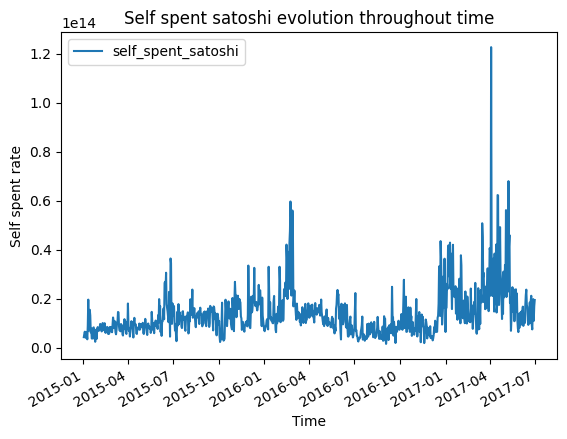

Correlation between self_spent_satoshi and nb_transactions = 0.33 
=> Medium correlation (< 0.7 and > 0.3)


In [34]:
# Creating a plot
plt.plot(df.index, df["self_spent_satoshi"], label='self_spent_satoshi')
plt.legend()
plt.title("Self spent satoshi evolution throughout time")
plt.xlabel("Time")
plt.ylabel("Self spent rate")
plt.gcf().autofmt_xdate()
plt.show()

# Correlation between self spent satoshi and nb of transactions
print("Correlation between self_spent_satoshi and nb_transactions =", round(df["self_spent_satoshi"].corr(df["nb_transactions"]), 2), "\n=> Medium correlation (< 0.7 and > 0.3)")

Cependant, nous remarquons que les nombres moyens d'entrées et de sorties par transaction sont négativement moyennement corrélées au cours du Bitcoin (> -0.7 et < -0.3). Plus le cours du Bitcoin augmente, plus les nombres moyens d'entrées et de sorties par transaction diminuent.

Cela peut suggérer que l'augmentation du cours du Bitcoin a un impact modéré négatif sur les nombres d'entrées et de sorties par transaction. Cela peut aussi suggérer que l'augmentation des nombres d'entrées et de sorties par transaction a un impact modéré négatif sur le cours du Bitcoin.

En effet, les transactions avec de nombreuses entrées et sorties peuvent être plus complexes et donc plus risquées à traiter pour les mineurs. Leur temps de traitement étant plus long, il diminue le nombre de transactions traités sur le réseau, paramètre pourtant positivement corrélé au cours du Bitcoin.

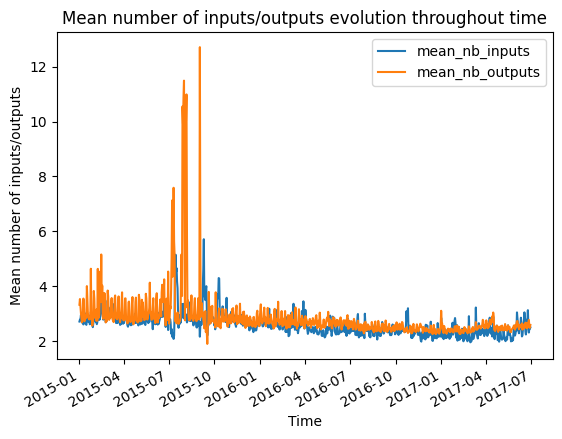

In [35]:
# Creating a plot
plt.plot(df.index, df["mean_nb_inputs"], label='mean_nb_inputs')
plt.plot(df.index, df["mean_nb_outputs"], label='mean_nb_outputs')
plt.legend()
plt.title("Mean number of inputs/outputs evolution throughout time")
plt.xlabel("Time")
plt.ylabel("Mean number of inputs/outputs")
plt.gcf().autofmt_xdate()
plt.show()

Nous remarquons enfin que les mesures de Bitcoins nouvellement créés sont négativement moyennement corrélées au cours du Bitcoin (> -0.7 et < -0.3). Plus le cours du Bitcoin augmente, plus les les mesures de Bitcoins nouvellement créés diminuent.

Cela peut suggérer que l'augmentation du cours du Bitcoin a un impact modéré négatif sur les mesures de Bitcoins nouvellement créés. Cela peut aussi suggérer que l'augmentation des mesures de Bitcoins nouvellement créés a un impact modéré négatif sur le cours du Bitcoin.

En effet, le protocole du Bitcoin prévoit une réduction de moitié de la récompense des mineurs tous les quatre ans environ. Cela signifie que la quantité de nouveaux bitcoins créés diminue progressivement avec le temps, ce qui peut entraîner une réduction de l'offre et une pression à la hausse sur le prix.

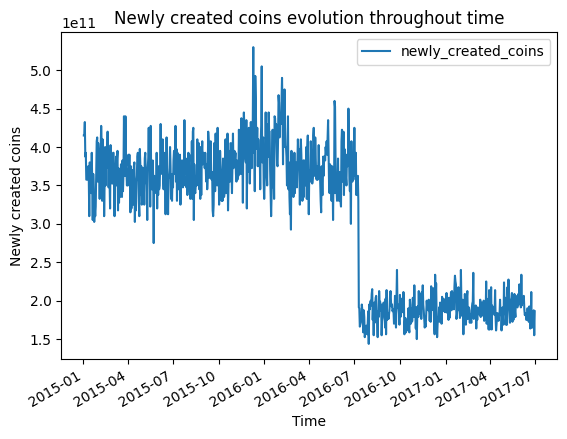

In [36]:
# Creating a plot
plt.plot(df.index, df["newly_created_coins"], label='newly_created_coins')
plt.legend()
plt.title("Newly created coins evolution throughout time")
plt.xlabel("Time")
plt.ylabel("Newly created coins")
plt.gcf().autofmt_xdate()
plt.show()

Certains paramètres sont donc liés au cours du Bitcoin et peuvent l'influencer.

Les paramètres pouvant l'influencer positivement d'après notre analyse seraient les différentes mesures de frais de mineurs, les nombres de transactions, le taux de hachage et le total des transactions de change.

Les paramètres pouvant l'influencer négativement d'après notre analyse seraient les nombres moyens d'entrées et de sorties par transaction, et les mesures de Bitcoins nouvellement créés.

Notre analyse corrélative est cependant limitée. 

Premièrement, nous ne controlons pas nos corrélations par des facteurs de confusion. 

Secondement, nos corrélations sont par essences des liens réciproques, n'étant pas des liens de causalité, nos interprétations ne restent que suggestives.

Finalement, nous manquons de données. Ne traitant qu'une courte echelle de temps (2015 - 2017) par à rapport à l'évolution du cours d'une monnaie, nous ne pouvons avoir un avis davantage robuste sur le lien entre les différents paramètres.

## III. Volatilité

Nous avons précédemment tenté de déterminer la tendance d'évolution du cours du Bitcoin ainsi que les différents paramètres pouvant l'influencer.

Cependant, une des limitations était que nous manquions de données, ne traitant qu'une croute échelle de temps (2015 - 2017). Cela peut fausser notre analyse, la valeur des liens ou des courbes prédictives pouvant drastiquement changer en augmentant la durée d'étude.

Pour confirmer notre inquiétude, nous pouvons mesurer la volatilité de nos données, soit la mesure des fluctuations ; plus la volatilité est importante, plus nos données fluctuent et changent au cours du temps.

Pour calculer la volatilité du cours du Bitcoin, nous pouvons calculer les variations quotidiennes du prix en pourcentage, puis calculer l'écart type de ces variations.

In [37]:
# Calculating the standard deviation of the daily percentage changes
pct_change = df['price_usd'].pct_change()
volatility = pct_change.std()
print("BTC volatility: {:.2f}%".format(volatility * 100))

BTC volatility: 3.36%


La volatilité du Bitcoin est d'environ 3% par jour. Pour nous faire une idée de son importance, comparons-la à celle de l'Or sur les 20 dernières années, connue pour être moins volatile que les crypto-monnaies.

In [38]:
# Loading the gold price data
gold_df = pd.read_csv('timeseries/gold.csv', parse_dates=['Date'])
gold_df

,Date,Open,High,Low,Close,Volume,Currency
0,2000-01-04,289.5,289.50,280.00,283.7,21621,USD
1,2000-01-05,283.7,285.00,281.00,282.1,25448,USD
2,2000-01-06,281.6,282.80,280.20,282.4,19055,USD
3,2000-01-07,282.5,284.50,282.00,282.9,11266,USD
4,2000-01-10,282.4,283.90,281.80,282.7,30603,USD
...,...,...,...,...,...,...,...
5698,2022-08-29,1748.4,1757.90,1731.40,1749.7,156220,USD
5699,2022-08-30,1749.8,1752.80,1732.90,1736.3,130664,USD
5700,2022-08-31,1735.5,1738.00,1720.60,1726.2,176731,USD
5701,2022-09-01,1723.0,1723.00,1699.10,1709.3,198618,USD


In [39]:
# Calculating the standard deviation of the daily percentage changes
daily_returns = gold_df['Close'].pct_change()
gold_volatility = daily_returns.std()
print("Gold volatility: {:.2f}%".format(gold_volatility * 100))

Gold volatility: 1.10%


La volatilité du Bitcoins entre 2015 et 2017 est ainsi plus élevée que pour l'Or sur les 20 dernières années, indiquant que le cours du Bitcoins subit de fortes fluctuations pouvant impacter la valeur des liens et des courbes prédictives, confirmant notre inquiétude.

## Conclusion

En conclusion, l'étude des courbes prédictives tend à montrer que l'évolution du cours du Bitcoin serait exponentielle, augmentant de plus en plus vite au fur et à mesure du temps.

L'étude corrélative tend quant à elle à montrer que l'évolution du cours du Bitcoin serait lié et possiblement influencé par plusieurs paramètres ; notamment positivement par les différentes mesures de frais de mineurs, les nombres de transactions, le taux de hachage, et le total des transactions de change, ou négativement par les nombres moyens d'entrées et de sorties par transaction, ou les mesures de Bitcoins nouvellement créés.

L'étude de volatilité montre néanmoins que le cours du Bitcoin fluctue beaucoup au travers du temps, limitant les interprétations que l'on peut effectuer sur l'analyse de nos données.

S'ajoute à cela d'autres limitations, comme la correspondance imparfaite de nos courbes prédictives, le manque de controle de nos corrélations par des facteurs de confusion, le fait que nos corrélations ne soient pas des liens de causalité, ou le fait que nous manquions de données.

Enfin, notre étude permet tout de même de nous faire une idée sur l'évolution future du cours du Bitcoin ; continuant d'augmenter plus ou moins rapidement au fur et à mesure du temps, en connaissant des phases de flutuations importantes.